<a href="https://colab.research.google.com/github/leonardoub/cmepda/blob/master/explore_dtabase_BRATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

#LOAD DATA

In [2]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
#%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
path_GBM = '/gdrive/My Drive/BRATS/TCGA_GBM_radiomicFeatures.csv'
path_LGG = '/gdrive/My Drive/BRATS/TCGA_LGG_radiomicFeatures.csv'

In [0]:
#read csv
data_GBM = pd.read_csv(path_GBM) 
data_LGG = pd.read_csv(path_LGG) 

In [0]:
features_GBM = list(data_GBM.columns)
features_LGG = list(data_LGG.columns)
##features_GBM==features_LGG hanno le stesse features

In [0]:
#add histology
data_GBM['Histology'] = 'GBM'
data_LGG['Histology'] = 'LGG'

In [0]:
#le features a partire da TGM_Cog_X_2 sono quasi tutte nulle, posso toglierle
#tolgo da TGM_Cog_X_2 fino a TGM_T_6 comprese
index_1=features_GBM.index('TGM_Cog_X_2')
index_2=features_GBM.index('TGM_T_6')

data_GBM=data_GBM.drop(data_GBM.iloc[:, index_1:index_2+1], inplace = False, axis = 1) 
data_LGG=data_LGG.drop(data_LGG.iloc[:, index_1:index_2+1], inplace = False, axis = 1) 

In [0]:
#trovare le features che contengono almeno un Nan
fetaures_with_NAN_GBM = data_GBM.columns[data_GBM.isna().any()].tolist() #sono 0
fetaures_with_NAN_LGG = data_LGG.columns[data_LGG.isna().any()].tolist() #sono 444

In [0]:
#togliere le features che sono nulle per tutti i patterns, in pratica le features che
#fanno parte della tabella ma non sono state raccolte
data_without_features_all_nan_GBM = data_GBM.dropna(axis=1, how='all')
data_without_features_all_nan_LGG = data_LGG.dropna(axis=1, how='all')
##non ce ne sono

In [0]:
#lasciamo solo i patterns che non contengono nessuna Nan
data_patterns_without_NAN_GBM = data_GBM.dropna(axis=0) #sono 102/102
data_patterns_without_NAN_LGG = data_LGG.dropna(axis=0) #sono 44/65

In [0]:
#merging datasetd
data_with_nan = pd.concat([data_GBM, data_LGG], ignore_index=True)

data_without_nan = pd.concat([data_patterns_without_NAN_GBM, data_patterns_without_NAN_LGG], ignore_index=True)

In [0]:
data = data_without_nan.drop(['Histology', 'ID', 'Date'], axis=1)  
labels = data_without_nan.Histology

#Correlation

In [17]:
data.corr()

,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_over_TC,VOLUME_NET_over_TC,VOLUME_ED_over_TC,VOLUME_ET_OVER_WT,VOLUME_NET_OVER_WT,VOLUME_ED_OVER_WT,VOLUME_TC_OVER_WT,VOLUME_ET_OVER_BRAIN,VOLUME_NET_OVER_BRAIN,VOLUME_ED_over_BRAIN,VOLUME_TC_over_BRAIN,VOLUME_WT_OVER_BRAIN,DIST_Vent_TC,DIST_Vent_ED,INTENSITY_Mean_ET_T1Gd,INTENSITY_STD_ET_T1Gd,INTENSITY_Mean_ET_T1,INTENSITY_STD_ET_T1,INTENSITY_Mean_ET_T2,INTENSITY_STD_ET_T2,INTENSITY_Mean_ET_FLAIR,INTENSITY_STD_ET_FLAIR,INTENSITY_Mean_NET_T1Gd,INTENSITY_STD_NET_T1Gd,INTENSITY_Mean_NET_T1,INTENSITY_STD_NET_T1,INTENSITY_Mean_NET_T2,INTENSITY_STD_NET_T2,INTENSITY_Mean_NET_FLAIR,INTENSITY_STD_NET_FLAIR,INTENSITY_Mean_ED_T1Gd,INTENSITY_STD_ED_T1Gd,INTENSITY_Mean_ED_T1,...,TEXTURE_NGTDM_ED_T1_Contrast,TEXTURE_NGTDM_ED_T1_Busyness,TEXTURE_NGTDM_ED_T1_Complexity,TEXTURE_NGTDM_ED_T1_Strength,TEXTURE_NGTDM_ED_T2_Coarseness,TEXTURE_NGTDM_ED_T2_Contrast,TEXTURE_NGTDM_ED_T2_Busyness,TEXTURE_NGTDM_ED_T2_Complexity,TEXTURE_NGTDM_ED_T2_Strength,TEXTURE_NGTDM_ED_FLAIR_Coarseness,TEXTURE_NGTDM_ED_FLAIR_Contrast,TEXTURE_NGTDM_ED_FLAIR_Busyness,TEXTURE_NGTDM_ED_FLAIR_Complexity,TEXTURE_NGTDM_ED_FLAIR_Strength,TEXTURE_NGTDM_NET_T1Gd_Coarseness,TEXTURE_NGTDM_NET_T1Gd_Contrast,TEXTURE_NGTDM_NET_T1Gd_Busyness,TEXTURE_NGTDM_NET_T1Gd_Complexity,TEXTURE_NGTDM_NET_T1Gd_Strength,TEXTURE_NGTDM_NET_T1_Coarseness,TEXTURE_NGTDM_NET_T1_Contrast,TEXTURE_NGTDM_NET_T1_Busyness,TEXTURE_NGTDM_NET_T1_Complexity,TEXTURE_NGTDM_NET_T1_Strength,TEXTURE_NGTDM_NET_T2_Coarseness,TEXTURE_NGTDM_NET_T2_Contrast,TEXTURE_NGTDM_NET_T2_Busyness,TEXTURE_NGTDM_NET_T2_Complexity,TEXTURE_NGTDM_NET_T2_Strength,TEXTURE_NGTDM_NET_FLAIR_Coarseness,TEXTURE_NGTDM_NET_FLAIR_Contrast,TEXTURE_NGTDM_NET_FLAIR_Busyness,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1
VOLUME_ET,1.000000,-0.120796,0.175781,0.431875,0.394119,-0.027798,-0.038212,0.407547,-0.407547,-0.276187,0.775692,-0.238468,-0.331599,0.331599,0.994343,-0.117615,0.175991,0.460916,0.414383,-0.404728,-0.247072,0.168048,0.153095,0.135700,0.047364,0.065101,0.477766,-0.182641,0.280385,0.133555,-0.052637,0.150027,-0.089739,0.228783,0.410420,-0.074172,0.056040,-0.002061,-0.239206,0.098282,...,-0.293098,0.292175,-0.298663,-0.095848,-0.259585,0.023557,0.299517,0.021516,-0.274581,-0.255211,-0.046633,0.190821,-0.011849,-0.224621,-0.222886,-0.120845,0.049136,-0.113486,-0.243457,-0.220863,-0.198341,0.039337,-0.161679,-0.241485,-0.248102,0.049595,-0.045614,0.101445,-0.267960,-0.231170,-0.142889,-0.003972,-0.084923,-0.247411,-0.273888,-0.243911,-0.056818,0.097580,-0.008258,0.434075
VOLUME_NET,-0.120796,1.000000,0.110332,0.843160,0.619897,0.179745,-0.301102,-0.735655,0.735655,-0.273470,-0.356019,0.834144,-0.589585,0.589585,-0.128250,0.992206,0.083480,0.813461,0.582527,-0.344774,-0.148185,-0.295282,-0.213777,-0.179915,-0.097740,-0.060870,-0.125506,0.009412,-0.105654,-0.269548,0.157563,-0.238023,0.164746,-0.017863,0.082749,-0.080932,0.261510,0.056508,0.316003,-0.066901,...,0.195331,0.053925,0.210155,0.024015,-0.080931,0.085845,0.167014,0.054432,-0.108155,-0.215863,0.319535,0.219228,0.255219,-0.218840,-0.240544,-0.284248,0.661738,-0.171680,-0.312401,-0.250146,-0.134565,0.320530,-0.027777,-0.319803,-0.270420,-0.419238,0.891096,-0.298488,-0.344712,-0.258077,-0.165403,0.493431,-0.057343,-0.340066,-0.081623,-0.133506,-0.073031,-0.277584,0.003140,0.537564
VOLUME_ED,0.175781,0.110332,1.000000,0.195454,0.769535,0.088838,-0.078571,0.016281,-0.016281,0.170127,-0.201984,-0.211728,0.366625,-0.366625,0.159749,0.106072,0.987449,0.185703,0.767445,-0.227552,-0.311178,0.038121,0.099935,0.105464,-0.032602,0.202038,0.116648,-0.052432,0.021214,-0.035739,-0.063973,0.108238,-0.118621,0.142511,0.016502,-0.096482,-0.085583,-0.169847,-0.136691,0.045392,...,-0.365563,0.739083,-0.315345,-0.576703,-0.693887,-0.499756,0.765992,-0.449392,-0.669190,-0.681485,-0.460401,0.508263,-0.325402,-0.595655,-0.176904,0.03

In [20]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


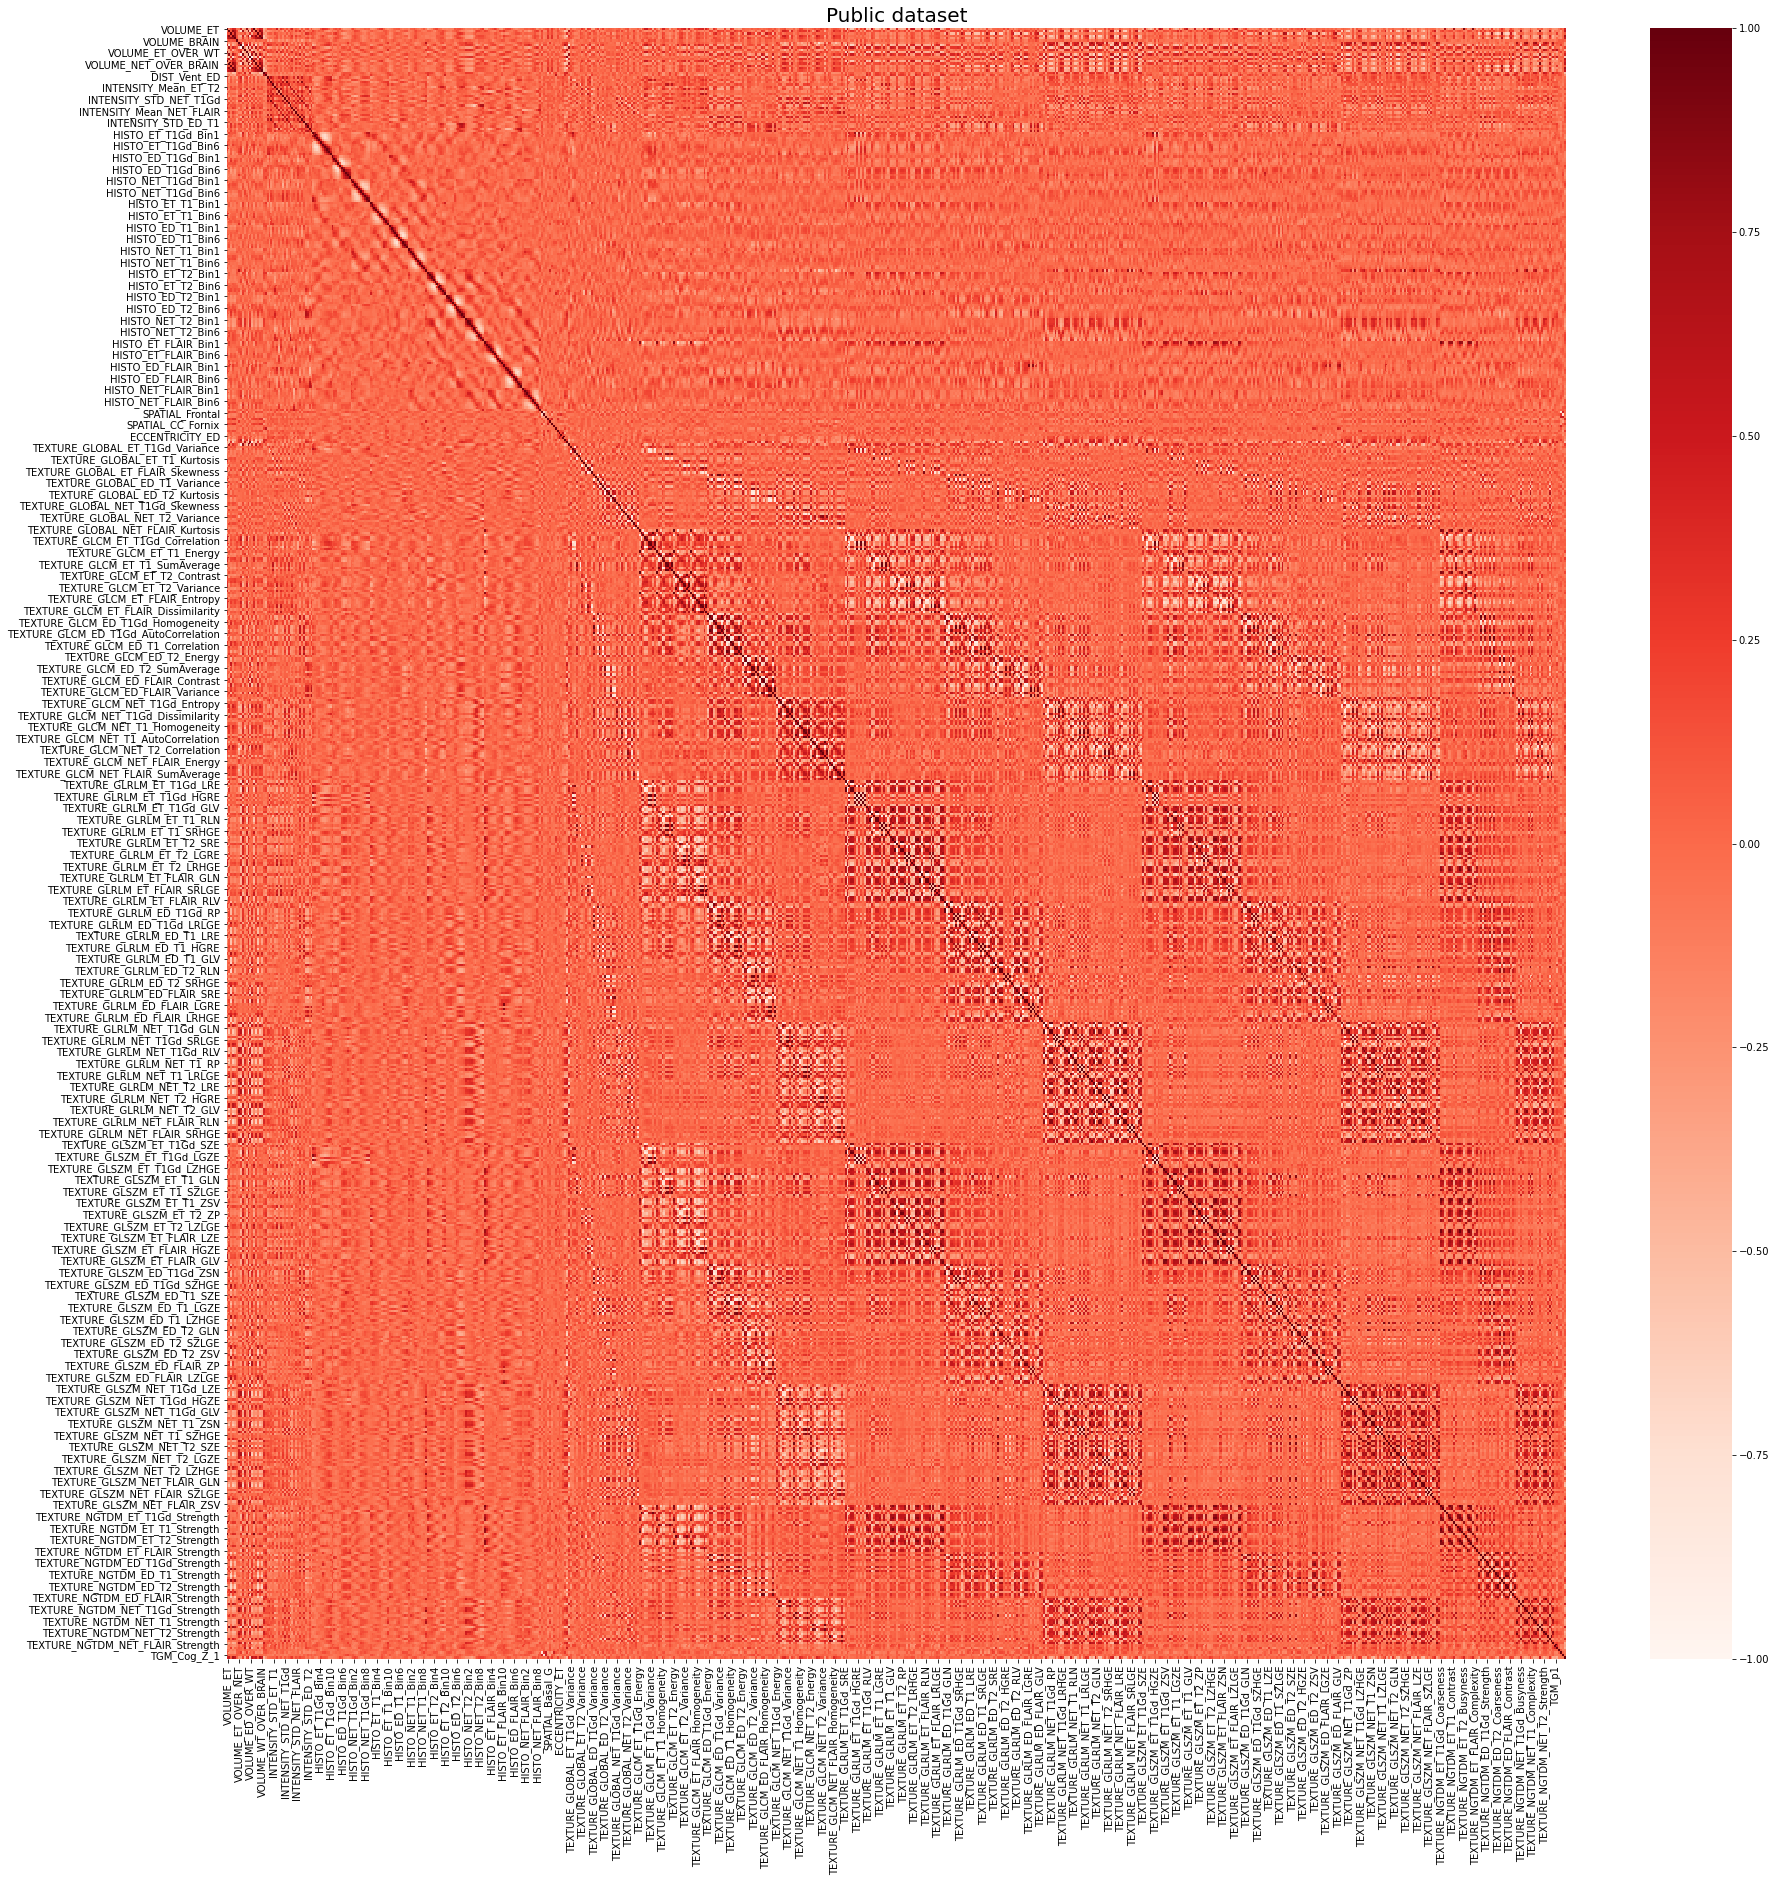

In [22]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = data.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.title('Public dataset', fontsize=20)
plt.show()

#PCA

In [0]:
from sklearn.decomposition import PCA

In [173]:
pca_1 = PCA(0.95)
data_pca_1 = pca_1.fit_transform(data)
print(pca_1.explained_variance_ratio_)

[0.7557724  0.13859944 0.04859226 0.01965786]


In [174]:
pca_1.explained_variance_ratio_.sum()

0.9626219649544644

In [175]:
data_pca_1.shape

(146, 4)

In [166]:
pca_1.n_components_

2

PCA dopo standardizzazione?

In [0]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
stds = RobustScaler() 
data_stand = stds.fit_transform(data, labels)

In [114]:
data_stand.shape

(146, 704)

In [115]:
pca = PCA(0.8)
data_stand_pca = pca.fit_transform(data_stand)
print(pca.explained_variance_ratio_)

[0.97471874]


In [116]:
pca.explained_variance_ratio_.sum()

0.9747187436530145

In [117]:
data_stand_pca.shape

(146, 1)

#TRAIN TEST SPLIT

In [0]:
from sklearn.model_selection import train_test_split

#Train test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=500)

#SVM

In [0]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [0]:
scaler = MinMaxScaler()
svm = SVC(kernel='linear')
steps = [('scaler', scaler), ('clf', svm)]    
pipeline = Pipeline(steps)
summary = pipeline.named_steps
pipeline.fit(X_train, y_train)
score_train = pipeline.score(X_train, y_train)
score_test = pipeline.score(X_test, y_test)

In [97]:
score_train

1.0

In [98]:
score_test

0.8181818181818182

In [99]:
svm.support_

array([  0,   4,  12,  13,  16,  19,  20,  21,  33,  35,  49,  55,  56,
        57,  58,  69,  70,  77,  79,  80,  84,  85,  86,  91,  92, 101,
         2,   8,  10,  14,  23,  26,  29,  37,  47,  48,  52,  60,  65,
        68,  78,  81,  83,  89,  99], dtype=int32)

In [100]:
svm.support_vectors_

array([[0.10861787, 0.03987203, 0.1291611 , ..., 0.29558471, 0.612212  ,
        0.17632641],
       [0.2356204 , 0.05212977, 0.05919944, ..., 0.67896311, 0.33254539,
        0.30935338],
       [0.09821637, 0.01346342, 0.47617595, ..., 0.        , 0.47754627,
        0.09327866],
       ...,
       [0.0364367 , 0.01157558, 1.        , ..., 0.15601774, 0.70053175,
        0.04566922],
       [0.04173184, 0.52874858, 0.58086427, ..., 0.62074483, 0.43016277,
        0.36518701],
       [0.00172609, 0.12237646, 0.09853502, ..., 0.46226914, 0.49758561,
        0.18435164]])

In [101]:
svm.n_support_

array([26, 19], dtype=int32)

In [102]:
y_pred = pipeline.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[29,  2],
       [ 6,  7]])

In [103]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.87878788, 0.63636364])

#Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc = RandomForestClassifier(class_weight='balanced')

In [106]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
rfc.score(X_train, y_train)

1.0

In [108]:
rfc.score(X_test, y_test)

0.8863636363636364

In [0]:
y_pred = rfc.predict(X_test)

In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[30,  1],
       [ 4,  9]])

In [111]:
y_scores = rfc.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_scores[:,1])

0.9069478908188586

In [112]:
y_scores[:,1]

array([0.04, 0.02, 0.58, 0.9 , 0.07, 0.46, 0.86, 0.15, 0.95, 0.15, 0.03,
       0.17, 0.29, 0.07, 0.49, 0.19, 0.11, 0.09, 0.84, 0.73, 0.11, 0.57,
       0.03, 0.25, 0.12, 0.19, 0.23, 0.09, 0.54, 0.39, 0.13, 0.42, 0.18,
       0.04, 0.9 , 0.03, 0.15, 0.11, 0.82, 0.34, 0.06, 0.24, 0.02, 0.12])

In [113]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.92307692, 0.7826087 ])

In [0]:
rank_features = rfc.feature_importances_

In [56]:
rank_features

array([0.01310402, 0.01121394, 0.        , 0.        , 0.        ,
       0.0005672 , 0.01258553, 0.00774925, 0.002795  , 0.01151346,
       0.00147779, 0.00119635, 0.01297765, 0.00564796, 0.00209593,
       0.        , 0.00971588, 0.00357109, 0.        , 0.        ,
       0.00035778, 0.00044543, 0.00188642, 0.00141505, 0.00078674,
       0.        , 0.00351374, 0.        , 0.00592684, 0.00051929,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00103036, 0.        , 0.00026749, 0.        , 0.00026753,
       0.        , 0.00052838, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00095373, 0.        , 0.00103891,
       0.00219555, 0.00377712, 0.        , 0.00025098, 0.00103194,
       0.00132931, 0.00151379, 0.0008975 , 0.00049209, 0.        ,
       0.00058401, 0.00048965, 0.        , 0.00049298, 0.00123476,
       0.00391206, 0.        , 0.00086936, 0.00052843, 0.        ,
       0.        , 0.00108329, 0.        , 0.        , 0.00749

In [57]:
 sorted(zip(rank_features, X_train.columns), reverse=True)

[(0.04760820691614702, 'TEXTURE_NGTDM_ET_T2_Busyness'),
 (0.043456603929617456, 'TEXTURE_NGTDM_ET_T1Gd_Busyness'),
 (0.03212654494176739, 'TEXTURE_NGTDM_ET_T2_Strength'),
 (0.02954069263833438, 'TEXTURE_NGTDM_ET_T1Gd_Coarseness'),
 (0.02606989755666391, 'TEXTURE_GLRLM_ET_FLAIR_RLV'),
 (0.02201818049925329, 'TEXTURE_NGTDM_ET_T1Gd_Strength'),
 (0.021834003252269918, 'TEXTURE_GLSZM_ET_T2_ZSV'),
 (0.02179930856784665, 'TEXTURE_NGTDM_ET_T1_Busyness'),
 (0.02108698169563564, 'TEXTURE_NGTDM_ET_FLAIR_Coarseness'),
 (0.019628710662976095, 'TEXTURE_GLOBAL_ET_T2_Kurtosis'),
 (0.019285706713532514, 'TEXTURE_GLRLM_ET_T2_RLV'),
 (0.013104021337323413, 'VOLUME_ET'),
 (0.01297765229158921, 'VOLUME_ET_OVER_WT'),
 (0.012585527564510283, 'VOLUME_ET_OVER_NET'),
 (0.011617136593113855, 'TEXTURE_GLRLM_ET_T1_RLV'),
 (0.011513459198181697, 'VOLUME_ET_over_TC'),
 (0.011213944305958004, 'VOLUME_NET'),
 (0.010441438959990092, 'TEXTURE_NGTDM_ET_FLAIR_Busyness'),
 (0.01022712636906589, 'TEXTURE_NGTDM_NET_FLAIR_Bus

In [0]:
MAX=rank_features.max()

In [31]:
type(rank_features)

numpy.ndarray

In [46]:
np.where(rank_features==MAX)

(array([16]),)

In [47]:
MAX

0.04410687129619691

In [48]:
X_train.columns[6]

'VOLUME_ET_OVER_NET'

In [35]:
X_train.columns[648]

'TEXTURE_NGTDM_ET_T2_Coarseness'

In [49]:
X_train.columns[16]

'VOLUME_ET_OVER_BRAIN'